In [112]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')
# 그래프에서 한글 깨짐 방지
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)




In [113]:
df=pd.read_csv('./raw_data/t-1_raw_외감.csv',index_col=False,encoding='euc-kr')

In [114]:
df.isna().sum()

회사명                   0
거래소코드                 0
회계년도                  0
산업분류코드                0
부채비율                 57
당좌비율                 57
유동비율                 57
이자보상배율               57
OCF(천원)              55
이자비용(천원)             55
차입금의존도               57
자기자본구성비율             57
당기순이익(천원)            55
감가상각비(백만원)         1312
금융비용(백만원)           187
단기차입금(천원)            55
유동성장기부채(천원)          55
장기차입금(천원)            55
법인세비용차감전손익(백만원)      72
매출액영업이익률             57
자기자본순이익률             57
총자본순이익률              57
매출액(천원)              55
총자본회전률               57
자기자본회전률              57
운전자본회전률              57
순운전자본회전률             57
재고자산회전률              57
당좌자산회전률              57
유동자산회전률              57
매출액증가율               56
총자본증가율               56
자기자본증가율              56
순이익증가율               56
유형자산증가율              56
유동자산증가율              56
재고자산증가율              56
영업이익증가율              56
총자본투자효율              66
부가가치율                66
노동소득분배율              66
자본분배율           

In [115]:
df.dropna(subset='자산총계(천원)', axis=0, inplace=True)
df.dropna(subset='법인세비용차감전손익(백만원)', axis=0, inplace=True)
df.dropna(subset='부가가치율', axis=0, inplace=True)
df.dropna(subset='부채비율', axis=0, inplace=True)
df.dropna(subset='매출액영업이익률', axis=0, inplace=True)

In [116]:
# df.drop('자본잠식률', axis=1, inplace=True)

- 결측치가 아닌 실제 0값이므로 0 대입(감가상각비, 금융비용)

In [117]:
df['감가상각비(백만원)'] = df['감가상각비(백만원)'].fillna(0)
df['금융비용(백만원)'] = df['금융비용(백만원)'].fillna(0)

In [118]:
df.isna().sum()

회사명                0
거래소코드              0
회계년도               0
산업분류코드             0
부채비율               0
당좌비율               0
유동비율               0
이자보상배율             0
OCF(천원)            0
이자비용(천원)           0
차입금의존도             0
자기자본구성비율           0
당기순이익(천원)          0
감가상각비(백만원)         0
금융비용(백만원)          0
단기차입금(천원)          0
유동성장기부채(천원)        0
장기차입금(천원)          0
법인세비용차감전손익(백만원)    0
매출액영업이익률           0
자기자본순이익률           0
총자본순이익률            0
매출액(천원)            0
총자본회전률             0
자기자본회전률            0
운전자본회전률            0
순운전자본회전률           0
재고자산회전률            0
당좌자산회전률            0
유동자산회전률            0
매출액증가율             0
총자본증가율             0
자기자본증가율            0
순이익증가율             0
유형자산증가율            0
유동자산증가율            0
재고자산증가율            0
영업이익증가율            0
총자본투자효율            0
부가가치율              0
노동소득분배율            0
자본분배율              0
이윤분배율              0
ICF(천원)            0
FCF(천원)            0
자산총계(천원)           0
부채총계(천원)           0
자본총계(천원)     

---

- 이자보상배율 구하기
    - 결측치를 0으로 채우기
    - inf : 절삭하고 최대값 대입
    - -inf : 절삭하고 최소값 대입

In [119]:
import pandas as pd
import numpy as np

def trim_outliers(series):
    # 양쪽 극단치를 제외한 범위 계산
    lower_percentile = series.quantile(0.01)
    upper_percentile = series.quantile(0.99)

    # 극단치를 제외한 데이터 선택
    trimmed_series = series[(series >= lower_percentile) & (series <= upper_percentile)]

    return trimmed_series

In [120]:
df['이자보상배율'] = (df['영업손익(천원)'] + df['감가상각비(백만원)']) / df['이자비용(천원)']

In [121]:
len(df[df['이자비용(천원)']==0])

23941

In [122]:
df['이자보상배율'].replace(np.inf,6057.061304,inplace=True)
df['이자보상배율'].replace(-(np.inf),-198.699143,inplace=True)

In [123]:
df['이자보상배율'].fillna(0,inplace=True)

In [124]:
a=df[~(df['이자비용(천원)']==0)]['이자보상배율']

In [125]:
df1 = trim_outliers(a)

In [126]:
df1.agg(['max','min'])

max    6057.061304
min    -198.699143
Name: 이자보상배율, dtype: float64

---

- 파생변수들 만들기

In [131]:
df['OCF이자보상배율'] = df['OCF(천원)']/df['이자비용(천원)']   ## 파보배

df['부채상환계수'] = (df['당기순이익(천원)']+(df['감가상각비(백만원)']*1000)+(df['금융비용(백만원)']*1000))/(df['단기차입금(천원)']+df['유동성장기부채(천원)']+(df['금융비용(백만원)']*1000))
df['장기부채상환능력'] = df['장기차입금(천원)']/((df['법인세비용차감전손익(백만원)']*1000)+(df['감가상각비(백만원)']*1000)+df['이자비용(천원)'])
df['매출액대비금융비용상환능력'] = df['매출액(천원)']/(df['금융비용(백만원)']*1000)  

df['전체현금흐름(천원)'] = df['OCF(천원)']+df['ICF(천원)']+df['FCF(천원)']
df['잉여현금흐름(FCF)']= df['OCF(천원)']+df['ICF(천원)']

df['연구개발비대비매출액'] = df['연구개발비(천원)']/df['매출액(천원)']
df['매출액대비현금흐름'] = df['전체현금흐름(천원)'] / df['매출액(천원)']
df['매출액대비잉여현금흐름'] = df['잉여현금흐름(FCF)']/ df['매출액(천원)']

df['총자산대비현금흐름'] = df['전체현금흐름(천원)'] / df['자산총계(천원)']
df['총자산대비영업현금흐름'] = df['OCF(천원)'] / df['자산총계(천원)']
df['총자산대비잉여현금흐름'] = df['잉여현금흐름(FCF)']/df['자산총계(천원)']

# 잉여현금흐름(FCF)

In [132]:
for i in df.index :
    if (df.loc[i,'OCF(천원)'] < 0) & (df.loc[i,'ICF(천원)'] < 0) &(df.loc[i,'FCF(천원)'] > 0) :
        df.loc[i,'기업수명주기'] = '도입기'
    elif (df.loc[i,'OCF(천원)'] > 0) & (df.loc[i,'ICF(천원)'] < 0) &(df.loc[i,'FCF(천원)'] > 0) :
        df.loc[i,'기업수명주기'] = '성장기'
    elif (df.loc[i,'OCF(천원)'] > 0) & (df.loc[i,'ICF(천원)'] < 0) &(df.loc[i,'FCF(천원)'] < 0) :
        df.loc[i,'기업수명주기'] = '성숙기'
    elif (df.loc[i,'OCF(천원)'] < 0) & (df.loc[i,'ICF(천원)'] > 0):
        df.loc[i,'기업수명주기'] = '쇠퇴기'
    else :
        df.loc[i,'기업수명주기'] = '수축기'

- OCF이자보상배율 구하기
    - 결측치를 0으로 채우기
    - inf : 절삭하고 최대값 대입
    - -inf : 절삭하고 최소값 대입

In [133]:
a=df[~(df['이자비용(천원)']==0)]['OCF이자보상배율']

In [134]:
df1 = trim_outliers(a)

In [135]:
df1.agg(['max','min'])

max    7823.166667
min    -618.027372
Name: OCF이자보상배율, dtype: float64

In [136]:
df['OCF이자보상배율'].replace(np.inf,7823.166667,inplace=True)
df['OCF이자보상배율'].replace(-(np.inf),-618.027372,inplace=True)

In [137]:
df['OCF이자보상배율'].describe()

count    1.883590e+05
mean     3.609614e+03
std      1.771091e+05
min     -7.982038e+06
25%     -1.277534e+00
50%      2.603870e+00
75%      1.953501e+01
max      5.041194e+07
Name: OCF이자보상배율, dtype: float64

#### 잘못 표기된 것 교체

In [140]:
# df[df['산업분류']=='공공 행정, 국방 및 사회보장 행정']

In [141]:
df.loc[173755,'산업분류']='부동산업'

In [142]:
# df['평균부채비율초과여부']=0

In [143]:
# 제조업 = {
#     2013: 77.2,
#     2014: 74.56,
#     2015: 71.95,
#     2016: 68.76,
#     2017: 66.86,
#     2018: 64.26,
#     2019: 65.44,
#     2020: 66.9,
#     2021: 69.1,
#     2022: 67.07
# }
# for year, item in 제조업.items():
#     df.loc[(df['산업분류']=='제조업') & (df['Year']==year) & (df['부채비율'] > item), '평균부채비율초과여부'] = 1

In [144]:
# 부동산업 = {
#     2013: 289.88,
#     2014: 321.49,
#     2015: 337.6,
#     2016: 329.55,
#     2017: 318.05,
#     2018: 321.98,
#     2019: 352.7,
#     2020: 386.86,
#     2021: 420.31,
#     2022: 413.37
# }
# for year, item in 부동산업.items():
#     df.loc[(df['산업분류']=='부동산업') & (df['Year']==year) & (df['부채비율'] > item), '평균부채비율초과여부'] = 1

In [145]:
# 도매및소매업 = {
#     2013: 114.9,
#     2014: 108.09,
#     2015: 106.03,
#     2016: 104.37,
#     2017: 99.51,
#     2018: 100.44,
#     2019: 108.46,
#     2020: 113.86,
#     2021: 116.12,
#     2022: 117.37
# }
# for year, item in 도매및소매업.items():
#     df.loc[(df['산업분류']=='도매 및 소매업') & (df['Year']==year) & (df['부채비율'] > item), '평균부채비율초과여부'] = 1

In [146]:
# 건설업 = {
#     2013: 165.76,
#     2014: 163.29,
#     2015: 169.4,
#     2016: 160.23,
#     2017: 140.63,
#     2018: 128.14,
#     2019: 130.63,
#     2020: 128.05,
#     2021: 129.54,
#     2022: 140.01
# }
# for year, item in 건설업.items():
#     df.loc[(df['산업분류']=='건설업') & (df['Year']==year) & (df['부채비율'] > item), '평균부채비율초과여부'] = 1

In [147]:
# 운수및창고업 = {
#     2013: 403.4,
#     2014: 351.48,
#     2015: 350.91,
#     2016: 325.06,
#     2017: 294.12,
#     2018: 300.4,
#     2019: 343.29,
#     2020: 354.74,
#     2021: 238.84,
#     2022: 171.36
# }
# for year, item in 운수및창고업.items():
#     df.loc[(df['산업분류']=='운수 및 창고업') & (df['Year']==year) & (df['부채비율'] > item), '평균부채비율초과여부'] = 1

In [148]:
# 정보통신업 = {
#     2013: 86.11,
#     2014: 80.835,
#     2015: 76.4,
#     2016: 77.01,
#     2017: 71.62,
#     2018: 68.38,
#     2019: 77.16,
#     2020: 82.135,
#     2021: 97.25,
#     2022: 92.285
# }
# for year, item in 정보통신업.items():
#     df.loc[(df['산업분류']=='정보통신업') & (df['Year']==year) & (df['부채비율'] > item), '평균부채비율초과여부'] = 1

In [149]:
# 전문과학기술 = {
#     2013: 64.59,
#     2014: 59.77,
#     2015: 54.17,
#     2016: 52.1,
#     2017: 54.67,
#     2018: 52.32,
#     2019: 53.42,
#     2020: 56.42,
#     2021: 51.48,
#     2022: 54.48
# }
# for year, item in 전문과학기술.items():
#     df.loc[(df['산업분류']=='전문, 과학 및 기술 서비스업') & (df['Year']==year) & (df['부채비율'] > item), '평균부채비율초과여부'] = 1

In [150]:
# 사업지원및사업시설관리서비스업 = {
#     2013: 332,
#     2014: 347.875,
#     2015: 344.75,
#     2016: 343.275,
#     2017: 351,
#     2018: 321.05,
#     2019: 303.74,
#     2020: 270.4,
#     2021: 288.89,
#     2022: 267.6
# }
# for year, item in 사업지원및사업시설관리서비스업.items():
#     df.loc[(df['산업분류']=='사업시설 관리, 사업 지원 및 임대 서비스업') & (df['Year']==year) & (df['부채비율'] > item), '평균부채비율초과여부'] = 1

In [151]:
# 숙박및음식점업 = {
#     2013: 101.96,
#     2014: 109.1,
#     2015: 120.84,
#     2016: 121.85,
#     2017: 135.44,
#     2018: 139.5,
#     2019: 162.26,
#     2020: 175.45,
#     2021: 195.49,
#     2022: 178.17
# }
# for year, item in 숙박및음식점업.items():
#     df.loc[(df['산업분류']=='숙박 및 음식점업') & (df['Year']==year) & (df['부채비율'] > item), '평균부채비율초과여부'] = 1

In [152]:
# 예술스포츠및여가관련서비스업 = {
#     2013: 345.34,
#     2014: 289.14,
#     2015: 248.01,
#     2016: 197.38,
#     2017: 188.18,
#     2018: 163.42,
#     2019: 160.96,
#     2020: 161.63,
#     2021: 159,
#     2022: 143.32
# }
# for year, item in 예술스포츠및여가관련서비스업.items():
#     df.loc[(df['산업분류']=='예술, 스포츠 및 여가관련 서비스업') & (df['Year']==year) & (df['부채비율'] > item), '평균부채비율초과여부'] = 1

In [153]:
# 수도하수및폐기물처리원료재생업 = {
#     2013: 190.85,
#     2014: 194.48,
#     2015: 192.13,
#     2016: 180.26,
#     2017: 168.91,
#     2018: 155.07,
#     2019: 155.16,
#     2020: 155.03,
#     2021: 138.85,
#     2022: 130.29
# }
# for year, item in 수도하수및폐기물처리원료재생업.items():
#     df.loc[(df['산업분류']=='수도, 하수 및 폐기물 처리, 원료 재생업') & (df['Year']==year) & (df['부채비율'] > item), '평균부채비율초과여부'] = 1

In [154]:
# 전기가스증기및공기조절공급업 = {
#     2013: 156.44,
#     2014: 159.33,
#     2015: 137.91,
#     2016: 131.77,
#     2017: 133.93,
#     2018: 141.99,
#     2019: 159.89,
#     2020: 159.08,
#     2021: 181.3,
#     2022: 272.92
# }
# for year, item in 전기가스증기및공기조절공급업.items():
#     df.loc[(df['산업분류']=='전기, 가스, 증기 및 공기조절 공급업') & (df['Year']==year) & (df['부채비율'] > item), '평균부채비율초과여부'] = 1

In [155]:
# 공공행정국방및사회보장행정 = {
#     2013: 89.89,
#     2014: 95,
#     2015: 98.58,
#     2016: 107.31,
#     2017: 117.31,
#     2018: 117.65,
#     2019: 134.99,
#     2020: 153.59,
#     2021: 193.71,
#     2022: 195.76
# }
# for year, item in 공공행정국방및사회보장행정.items():
#     df.loc[(df['산업분류']=='공공 행정, 국방 및 사회보장 행정') & (df['Year']==year) & (df['부채비율'] > item), '평균부채비율초과여부'] = 1

In [156]:
# 협회및단체수리및기타개인서비스업 = {
#     2013: 319.39,
#     2014: 290.53,
#     2015: 283.44,
#     2016: 301.84,
#     2017: 365.84,
#     2018: 395.38,
#     2019: 413.32,
#     2020: 400.57,
#     2021: 429.82,
#     2022: 340.55
# }
# for year, item in 협회및단체수리및기타개인서비스업.items():
#     df.loc[(df['산업분류']=='협회 및 단체, 수리 및 기타 개인 서비스업') & (df['Year']==year) & (df['부채비율'] > item), '평균부채비율초과여부'] = 1

In [157]:
# 농업임업및어업 = {
#     2013: 101.2,
#     2014: 99.87,
#     2015: 104.41,
#     2016: 103.63,
#     2017: 102.46,
#     2018: 104.51,
#     2019: 116.97,
#     2020: 119.92,
#     2021: 110.33,
#     2022: 106.22
# }
# for year, item in 농업임업및어업.items():
#     df.loc[(df['산업분류']=='농업, 임업 및 어업') & (df['Year']==year) & (df['부채비율'] > item), '평균부채비율초과여부'] = 1

In [158]:
# 금융및보험업 = {
#     2013: 714.6,
#     2014: 731.77,
#     2015: 766.98,
#     2016: 785.18,
#     2017: 784.22,
#     2018: 789.1,
#     2019: 749.49,
#     2020: 763.71,
#     2021: 743.09,
#     2022: 810.35
# }
# for year, item in 금융및보험업.items():
#     df.loc[(df['산업분류']=='금융 및 보험업') & (df['Year']==year) & (df['부채비율'] > item), '평균부채비율초과여부'] = 1

In [159]:
# 교육및서비스업 = {
#     2013: 78.32,
#     2014: 82.89,
#     2015: 87.42,
#     2016: 96.66,
#     2017: 106.13,
#     2018: 123.26,
#     2019: 141.66,
#     2020: 158.84,
#     2021: 174.89,
#     2022: 176.81
# }
# for year, item in 교육및서비스업.items():
#     df.loc[(df['산업분류']=='교육 서비스업') & (df['Year']==year) & (df['부채비율'] > item), '평균부채비율초과여부'] = 1

In [160]:
# 광업 ={
#     2013: 181.23,
#     2014: 244.88,
#     2015: 238.24,
#     2016: 155.24,
#     2017: 165.6,
#     2018: 157.51,
#     2019: 140.44,
#     2020: 142.07,
#     2021: 106.24,
#     2022: 116.05 
# }
# for year, item in 광업.items():
#     df.loc[(df['산업분류']=='광업') & (df['Year']==year) & (df['부채비율'] > item), '평균부채비율초과여부'] = 1

In [161]:
# 보건업및사회복지서비스업 = {
#     2013: 543.28,
#     2014: 569.05,
#     2015: 572.8,
#     2016: 509.1,
#     2017: 389.89,
#     2018: 424.205,
#     2019: 383.98,
#     2020: 447.81,
#     2021: 152.9,
#     2022: 124.98
# }
# for year, item in 보건업및사회복지서비스업.items():
#     df.loc[(df['산업분류']=='보건업 및 사회복지 서비스업') & (df['Year']==year) & (df['부채비율'] > item), '평균부채비율초과여부'] = 1

In [162]:
# df['평균부채비율초과여부'].value_counts()

---

- 매출액이 0인 회사, 음수인 회사는 문제 있는 데이터--> 삭제

In [163]:
df=df[~(df['매출액(천원)']==0.0)]
df=df[~(df['매출액(천원)']<0.0)]

- 자산총계가 0인회사, 음수인 회사는 문제 있는 데이터 --> 삭제

In [164]:
df=df[~(df['자산총계(천원)']==0)]
df=df[~(df['자산총계(천원)']<0)]

In [165]:
# pd.set_option('display.max_seq_item',None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df.isna().sum()

회사명                  0
거래소코드                0
회계년도                 0
산업분류코드               0
부채비율                 0
당좌비율                 0
유동비율                 0
이자보상배율               0
OCF(천원)              0
이자비용(천원)             0
차입금의존도               0
자기자본구성비율             0
당기순이익(천원)            0
감가상각비(백만원)           0
금융비용(백만원)            0
단기차입금(천원)            0
유동성장기부채(천원)          0
장기차입금(천원)            0
법인세비용차감전손익(백만원)      0
매출액영업이익률             0
자기자본순이익률             0
총자본순이익률              0
매출액(천원)              0
총자본회전률               0
자기자본회전률              0
운전자본회전률              0
순운전자본회전률             0
재고자산회전률              0
당좌자산회전률              0
유동자산회전률              0
매출액증가율               0
총자본증가율               0
자기자본증가율              0
순이익증가율               0
유형자산증가율              0
유동자산증가율              0
재고자산증가율              0
영업이익증가율              0
총자본투자효율              0
부가가치율                0
노동소득분배율              0
자본분배율                0
이윤분배율                0
ICF(천원)    

- OCF이자 보상배율이 결측치로 144개?
- 두 변수의 결측치는 모두 0 --> Why?
- 이자비용, OCF가 동시에 0인 경우!!!  --> 0으로 대체하기로함

In [166]:
len(df[(df['이자비용(천원)']==0) &(df['OCF(천원)']==0)])

143

In [167]:
df['OCF이자보상배율'].isna().sum()

143

In [168]:
df['OCF이자보상배율'].fillna(0,inplace=True)

In [169]:
pd.reset_option('display.max_rows', None)
pd.reset_option('display.max_columns', None)
pd.reset_option('display.width', None)
df.isna().sum()

회사명            0
거래소코드          0
회계년도           0
산업분류코드         0
부채비율           0
              ..
매출액대비잉여현금흐름    0
총자산대비현금흐름      0
총자산대비영업현금흐름    0
총자산대비잉여현금흐름    0
기업수명주기         0
Length: 68, dtype: int64

- 부채상환계수가 결측치로 5개?
- 분자 분모 구성 변수의 결측치는 모두 0 --> Why?
- 분자 분모 구성 변수가 동시에 0인 경우!!!  --> 0으로 대체하기로함

In [170]:
# len(df[(df['당기순이익(천원)']==0) &(df['감가상각비(백만원)']==0) &(df['금융비용(백만원)']==0)])
len(df[(df['단기차입금(천원)']==0) &(df['유동성장기부채(천원)']==0) &(df['금융비용(백만원)']==0) & (df['당기순이익(천원)']==0) &(df['감가상각비(백만원)']==0)])

5

In [171]:
df['부채상환계수'].fillna(0,inplace=True)

- 장기부채상환능력 결측치로 2개??
- 분자 분모 구성 변수의 결측치는 모두 0 --> Why?
- 분자 분모 구성 변수가 동시에 0인 경우!!!  --> 0으로 대체하기로함

In [172]:
len(df[(df['장기차입금(천원)']==0) & (df['법인세비용차감전손익(백만원)']==0) & (df['감가상각비(백만원)']==0) & (df['이자비용(천원)']==0)])

2

In [173]:
df['장기부채상환능력'].fillna(0,inplace=True)

- 결측치 확인 끝!!!!

In [175]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df.isna().sum()

회사명                0
거래소코드              0
회계년도               0
산업분류코드             0
부채비율               0
당좌비율               0
유동비율               0
이자보상배율             0
OCF(천원)            0
이자비용(천원)           0
차입금의존도             0
자기자본구성비율           0
당기순이익(천원)          0
감가상각비(백만원)         0
금융비용(백만원)          0
단기차입금(천원)          0
유동성장기부채(천원)        0
장기차입금(천원)          0
법인세비용차감전손익(백만원)    0
매출액영업이익률           0
자기자본순이익률           0
총자본순이익률            0
매출액(천원)            0
총자본회전률             0
자기자본회전률            0
운전자본회전률            0
순운전자본회전률           0
재고자산회전률            0
당좌자산회전률            0
유동자산회전률            0
매출액증가율             0
총자본증가율             0
자기자본증가율            0
순이익증가율             0
유형자산증가율            0
유동자산증가율            0
재고자산증가율            0
영업이익증가율            0
총자본투자효율            0
부가가치율              0
노동소득분배율            0
자본분배율              0
이윤분배율              0
ICF(천원)            0
FCF(천원)            0
자산총계(천원)           0
부채총계(천원)           0
자본총계(천원)     

- inf,-inf값 확인!!!

#### 7/26 inf 로직 사진 찍어논거 보기

In [111]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df.isin([np.inf,-np.inf]).sum()

회사명                0
거래소코드              0
회계년도               0
Year               0
산업분류코드             0
산업분류               0
부채비율               0
당좌비율               0
유동비율               0
이자보상배율             0
OCF(천원)            0
이자비용(천원)           0
차입금의존도             0
자기자본구성비율           0
당기순이익(천원)          0
감가상각비(백만원)         0
금융비용(백만원)          0
단기차입금(천원)          0
유동성장기부채(천원)        0
장기차입금(천원)          0
법인세비용차감전손익(백만원)    0
매출액영업이익률           0
자기자본순이익률           0
총자본순이익률            0
매출액(천원)            0
총자본회전률             0
자기자본회전률            0
운전자본회전률            0
순운전자본회전률           0
재고자산회전률            0
당좌자산회전률            0
유동자산회전률            0
매출액증가율             0
총자본증가율             0
자기자본증가율            0
순이익증가율             0
유형자산증가율            0
유동자산증가율            0
재고자산증가율            0
영업이익증가율            0
총자본투자효율            0
부가가치율              0
노동소득분배율            0
자본분배율              0
이윤분배율              0
ICF(천원)            0
FCF(천원)            0
자산총계(천원)     

In [65]:
df.shape

(178804, 68)

In [69]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df.isin([np.inf,-np.inf]).sum()

회사명                  0
거래소코드                0
회계년도                 0
산업분류코드               0
부채비율                 0
당좌비율                 0
유동비율                 0
이자보상배율               0
OCF(천원)              0
이자비용(천원)             0
차입금의존도               0
자기자본구성비율             0
당기순이익(천원)            0
감가상각비(백만원)           0
금융비용(백만원)            0
단기차입금(천원)            0
유동성장기부채(천원)          0
장기차입금(천원)            0
법인세비용차감전손익(백만원)      0
매출액영업이익률             0
자기자본순이익률             0
총자본순이익률              0
매출액(천원)              0
총자본회전률               0
자기자본회전률              0
운전자본회전률              0
순운전자본회전률             0
재고자산회전률              0
당좌자산회전률              0
유동자산회전률              0
매출액증가율               0
총자본증가율               0
자기자본증가율              0
순이익증가율               0
유형자산증가율              0
유동자산증가율              0
재고자산증가율              0
영업이익증가율              0
총자본투자효율              0
부가가치율                0
노동소득분배율              0
자본분배율                0
이윤분배율                0
ICF(천원)    

- 이자보상배율과 마찬가지로 부채상환계수, 장기부채상환능력, 매출액대비금융비용상환능력 또한 0으로 대체

In [70]:
len(df[(df['단기차입금(천원)']==0) &(df['유동성장기부채(천원)']==0) &(df['금융비용(백만원)']==0)])

213

In [71]:
len(df[(df['법인세비용차감전손익(백만원)']==0) &(df['감가상각비(백만원)']==0) &(df['이자비용(천원)']==0)])

8

In [72]:
len(df[df['금융비용(백만원)']==0])

477

In [73]:
df['부채상환계수'] = df['부채상환계수'].replace([np.inf, -np.inf], 0)
df['장기부채상환능력'] = df['장기부채상환능력'].replace([np.inf, -np.inf], 0)
df['매출액대비금융비용상환능력'] = df['매출액대비금융비용상환능력'].replace([np.inf, -np.inf], 0)

In [74]:
pd.reset_option('display.max_rows', None)
pd.reset_option('display.max_columns', None)
pd.reset_option('display.width', None)
df.isin([np.inf,-np.inf]).sum()

회사명            0
거래소코드          0
회계년도           0
산업분류코드         0
부채비율           0
              ..
매출액대비잉여현금흐름    0
총자산대비현금흐름      0
총자산대비영업현금흐름    0
총자산대비잉여현금흐름    0
기업수명주기         0
Length: 68, dtype: int64

- 데이터의 결측치, 무한대값 모두 0

---

In [75]:
df['t-1감사의견코드'].value_counts()

t-1감사의견코드
0.0    166333
1.0     12471
Name: count, dtype: int64

### 부채 총계 음수 ! -> 삭제!!! 
- 레이전트리 : 미지급 비용이 음수여서 부채 총계가 음수  --> 일반적이지 않으므로 삭제

In [76]:
df.reset_index(drop=True,inplace=True)

In [77]:
df[df['부채총계(천원)']<0]

,회사명,거래소코드,회계년도,산업분류코드,부채비율,당좌비율,유동비율,이자보상배율,OCF(천원),이자비용(천원),...,매출액대비금융비용상환능력,전체현금흐름(천원),잉여현금흐름(FCF),연구개발비대비매출액,매출액대비현금흐름,매출액대비잉여현금흐름,총자산대비현금흐름,총자산대비영업현금흐름,총자산대비잉여현금흐름,기업수명주기
136233,(주)레이전트리,76145,2015/12,47,-6.28,0.0,0.0,6057.061304,2404334.0,0.0,...,-441.172885,2409469.0,1758642.0,0.0,0.080792,0.058969,0.169251,0.16889,0.123534,성장기


In [78]:
df.drop(136233,axis=0,inplace=True)

In [79]:
df[df['부채총계(천원)']<0]

,회사명,거래소코드,회계년도,산업분류코드,부채비율,당좌비율,유동비율,이자보상배율,OCF(천원),이자비용(천원),...,매출액대비금융비용상환능력,전체현금흐름(천원),잉여현금흐름(FCF),연구개발비대비매출액,매출액대비현금흐름,매출액대비잉여현금흐름,총자산대비현금흐름,총자산대비영업현금흐름,총자산대비잉여현금흐름,기업수명주기


In [80]:
# df[(df['산업분류']=='공공 행정, 국방 및 사회보장 행정')]

---

#### 순서 재 배열 
    - t-1 감사의견 코드 맨 뒤로

In [81]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '산업분류코드', '부채비율', '당좌비율', '유동비율', '이자보상배율',
       'OCF(천원)', '이자비용(천원)', '차입금의존도', '자기자본구성비율', '당기순이익(천원)', '감가상각비(백만원)',
       '금융비용(백만원)', '단기차입금(천원)', '유동성장기부채(천원)', '장기차입금(천원)', '법인세비용차감전손익(백만원)',
       '매출액영업이익률', '자기자본순이익률', '총자본순이익률', '매출액(천원)', '총자본회전률', '자기자본회전률',
       '운전자본회전률', '순운전자본회전률', '재고자산회전률', '당좌자산회전률', '유동자산회전률', '매출액증가율',
       '총자본증가율', '자기자본증가율', '순이익증가율', '유형자산증가율', '유동자산증가율', '재고자산증가율',
       '영업이익증가율', '총자본투자효율', '부가가치율', '노동소득분배율', '자본분배율', '이윤분배율', 'ICF(천원)',
       'FCF(천원)', '자산총계(천원)', '부채총계(천원)', '자본총계(천원)', '산업분류', '자본금(천원)',
       '영업손익(천원)', '연구개발비(천원)', '자본잠식률', 'Year', 't-1감사의견코드', 'OCF이자보상배율',
       '부채상환계수', '장기부채상환능력', '매출액대비금융비용상환능력', '전체현금흐름(천원)', '잉여현금흐름(FCF)',
       '연구개발비대비매출액', '매출액대비현금흐름', '매출액대비잉여현금흐름', '총자산대비현금흐름', '총자산대비영업현금흐름',
       '총자산대비잉여현금흐름', '기업수명주기'],
      dtype='object')

In [82]:
order =['회사명', '거래소코드', '회계년도', 'Year', '산업분류코드', '산업분류','부채비율', '당좌비율', '유동비율', '이자보상배율',
       'OCF(천원)', '이자비용(천원)', '차입금의존도', '자기자본구성비율', '당기순이익(천원)', '감가상각비(백만원)',
       '금융비용(백만원)', '단기차입금(천원)', '유동성장기부채(천원)', '장기차입금(천원)', '법인세비용차감전손익(백만원)',
       '매출액영업이익률', '자기자본순이익률', '총자본순이익률', '매출액(천원)', '총자본회전률', '자기자본회전률',
       '운전자본회전률', '순운전자본회전률', '재고자산회전률', '당좌자산회전률', '유동자산회전률', '매출액증가율',
       '총자본증가율', '자기자본증가율', '순이익증가율', '유형자산증가율', '유동자산증가율', '재고자산증가율',
       '영업이익증가율', '총자본투자효율', '부가가치율', '노동소득분배율', '자본분배율', '이윤분배율', 'ICF(천원)',
       'FCF(천원)', '자산총계(천원)', '부채총계(천원)', '자본총계(천원)',  '자본금(천원)',
       '영업손익(천원)', '연구개발비(천원)', '자본잠식률', 'OCF이자보상배율',
       '부채상환계수', '장기부채상환능력', '매출액대비금융비용상환능력', '전체현금흐름(천원)', '잉여현금흐름(FCF)',
       '연구개발비대비매출액', '매출액대비현금흐름', '매출액대비잉여현금흐름', '총자산대비현금흐름', '총자산대비영업현금흐름',
       '총자산대비잉여현금흐름', '기업수명주기', '평균부채비율초과여부', 't-1감사의견코드']

In [83]:
df = df.reindex(columns=order)

In [84]:
df['t-1감사의견코드'].value_counts()

t-1감사의견코드
0.0    166333
1.0     12470
Name: count, dtype: int64

In [85]:
# df.to_csv('분리전_외감.csv',index=False,encoding='euc-kr')

---
- train-test split (2.3 / 7.7)

In [86]:
# (df['부채비율']==df['부채비율1']).value_counts()
# # (raw_data_1['회사명']==data_target['회사명']).value_counts()

In [87]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(df.drop('t-1감사의견코드',axis=1),df['t-1감사의견코드'],test_size=0.23,stratify=df['t-1감사의견코드'],random_state=0) 

In [88]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


137678
41125
137678
41125


---

In [89]:
train_data = pd.concat([X_train,y_train],axis=1)

In [90]:
train_data.shape

(137678, 69)

In [91]:
# train_data.to_csv('train_data.csv',index=False,encoding='euc-kr')

---

In [92]:
y_train.value_counts()

t-1감사의견코드
0.0    128076
1.0      9602
Name: count, dtype: int64

In [93]:
y_test.value_counts()

t-1감사의견코드
0.0    38257
1.0     2868
Name: count, dtype: int64

- X_train box-plot

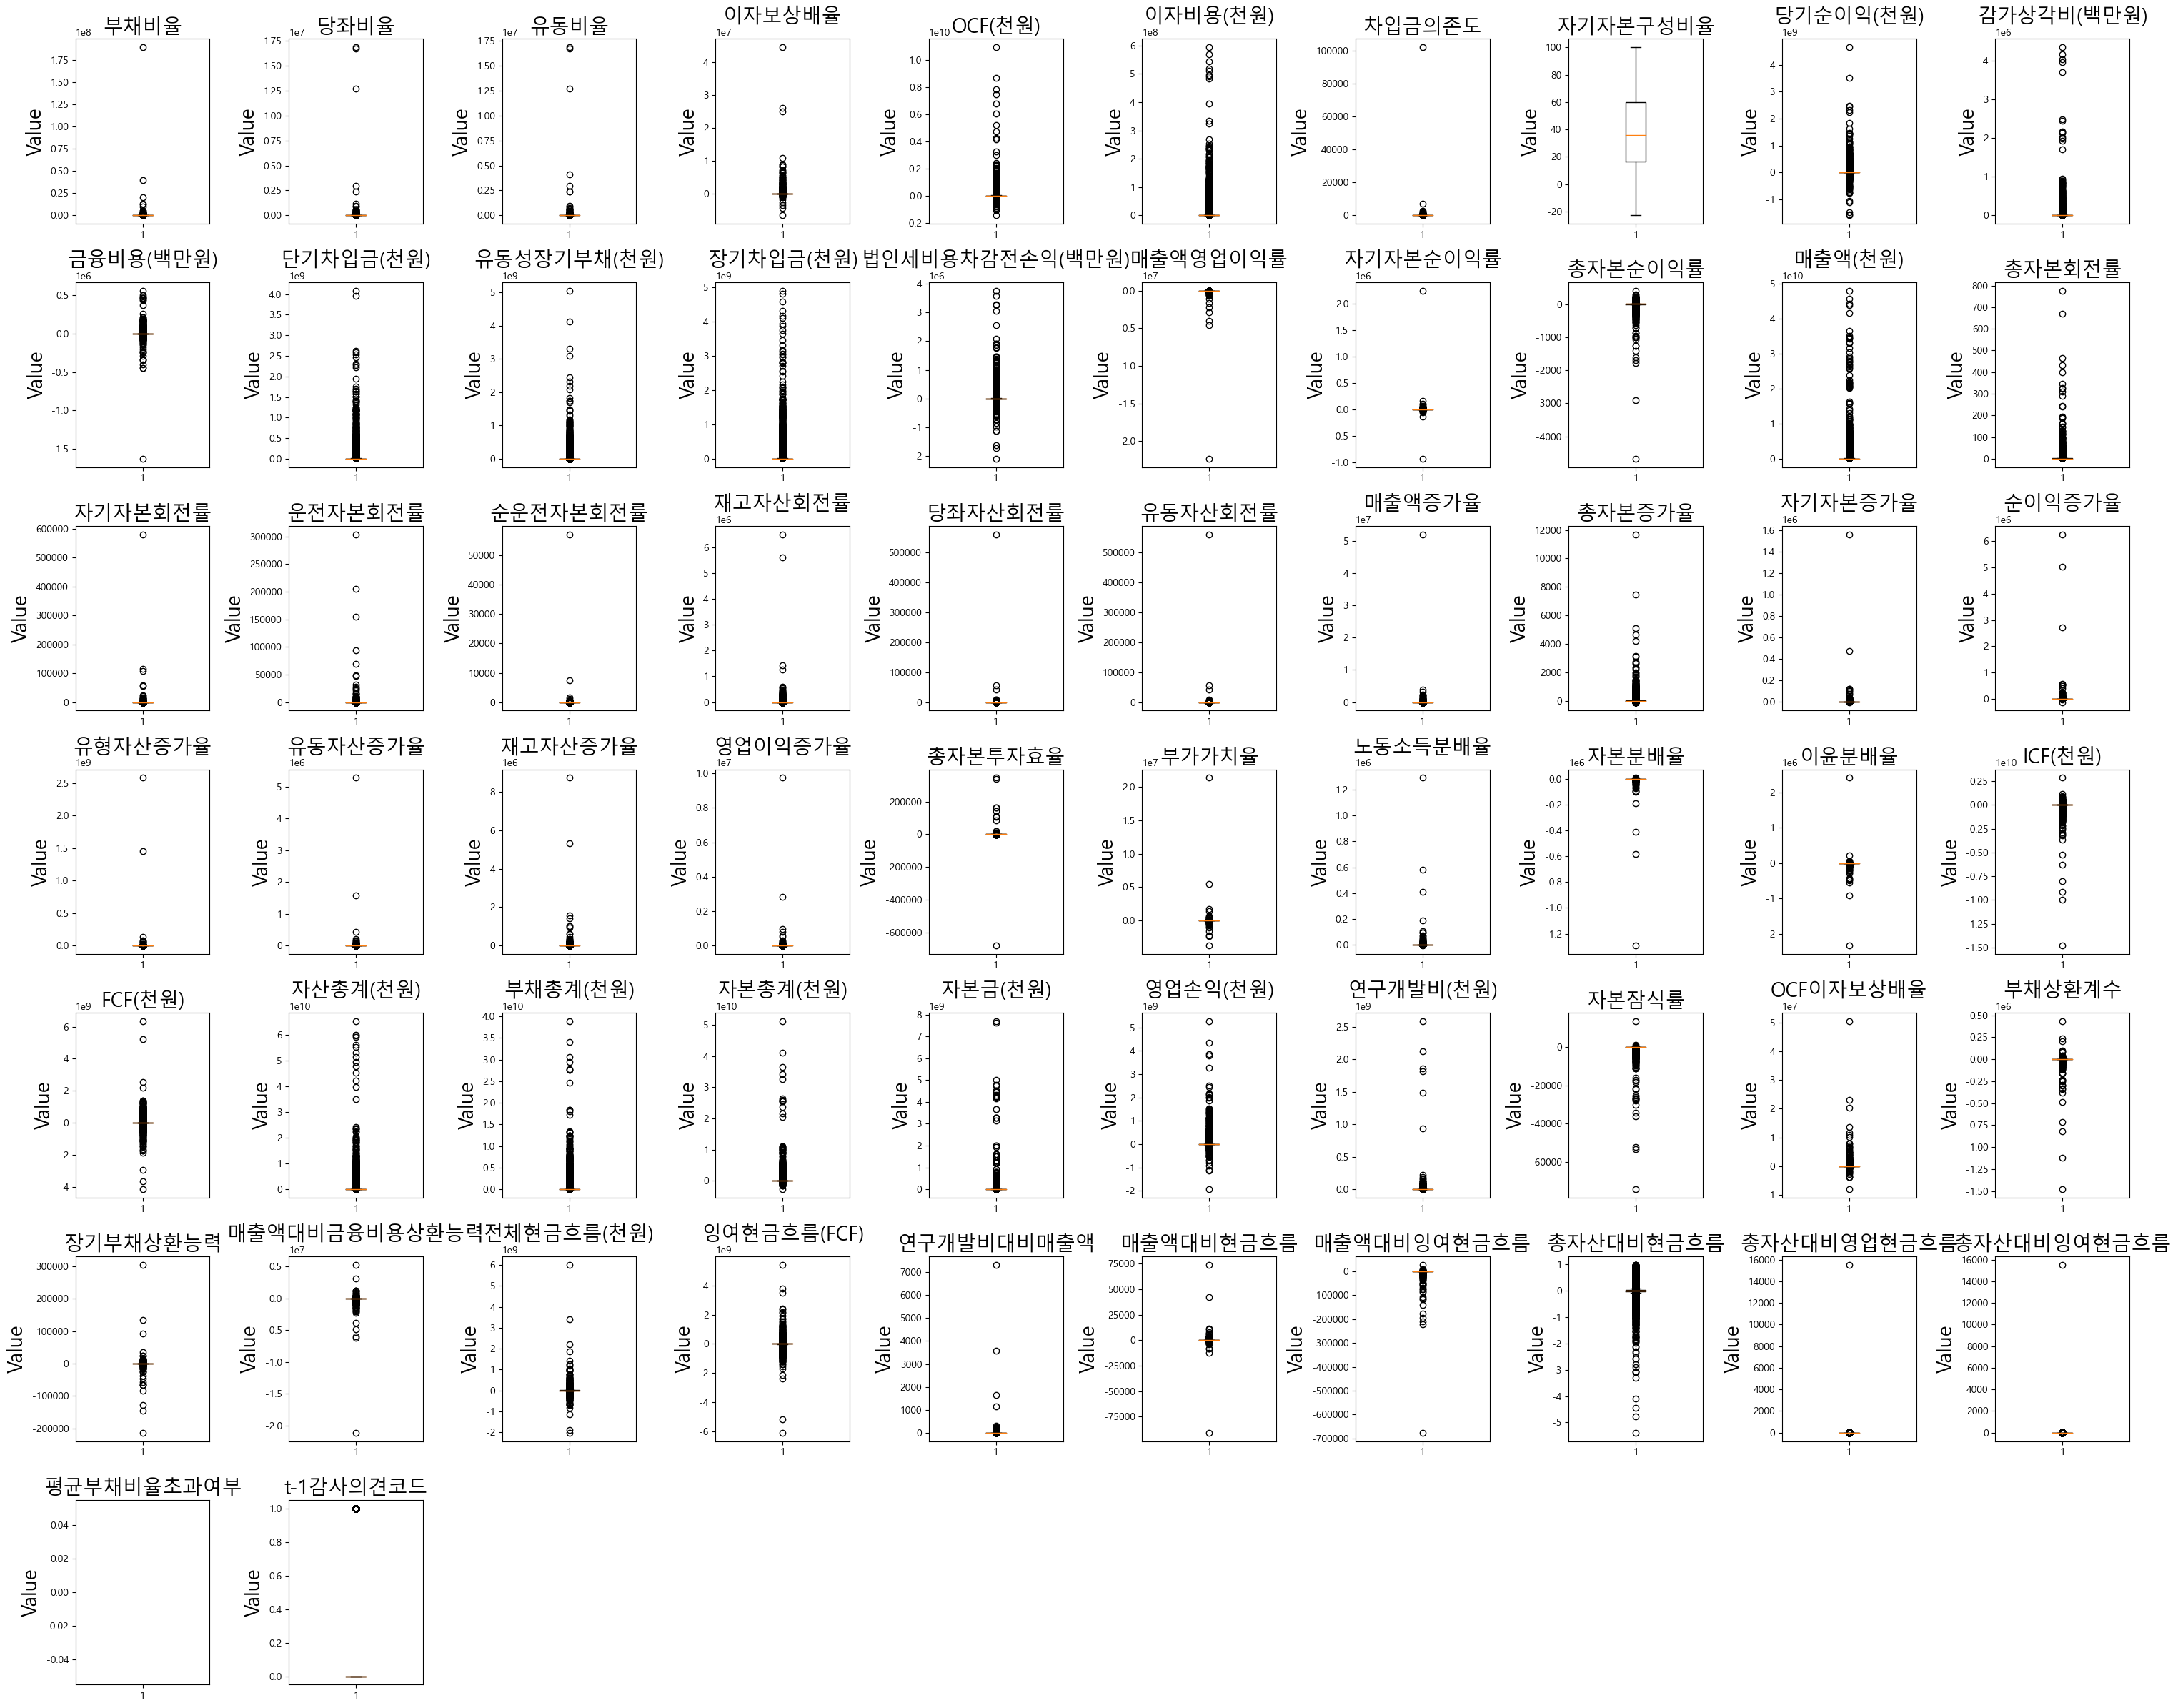

In [94]:
import matplotlib.pyplot as plt

df_수치_윈저라이징전 = train_data[train_data.select_dtypes(float).columns]
num_columns = len(df_수치_윈저라이징전.columns)

# 서브플롯의 크기 계산
nrows = (num_columns - 1) // 10 + 1
ncols = min(num_columns, 10)

# subplots로 boxplot 출력 (계산된 행과 열 개수로 서브플롯 그리기)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 24))

# 컬럼 개수에 따라 그려야 할 서브플롯의 개수만큼만 boxplot 그리기
for i, col in enumerate(df_수치_윈저라이징전):
    ax = axes[i // ncols, i % ncols]
    ax.boxplot(df_수치_윈저라이징전[col].dropna())
    ax.set_title(col, fontsize=20)  # 글씨 크기 설정
    ax.set_ylabel('Value', fontsize=20)  # 글씨 크기 설정

# 남은 서브플롯 삭제
for j in range(num_columns, nrows * ncols):
    fig.delaxes(axes.flatten()[j])  # 남은 서브플롯의 인덱스를 가져옴

plt.tight_layout()
plt.show()


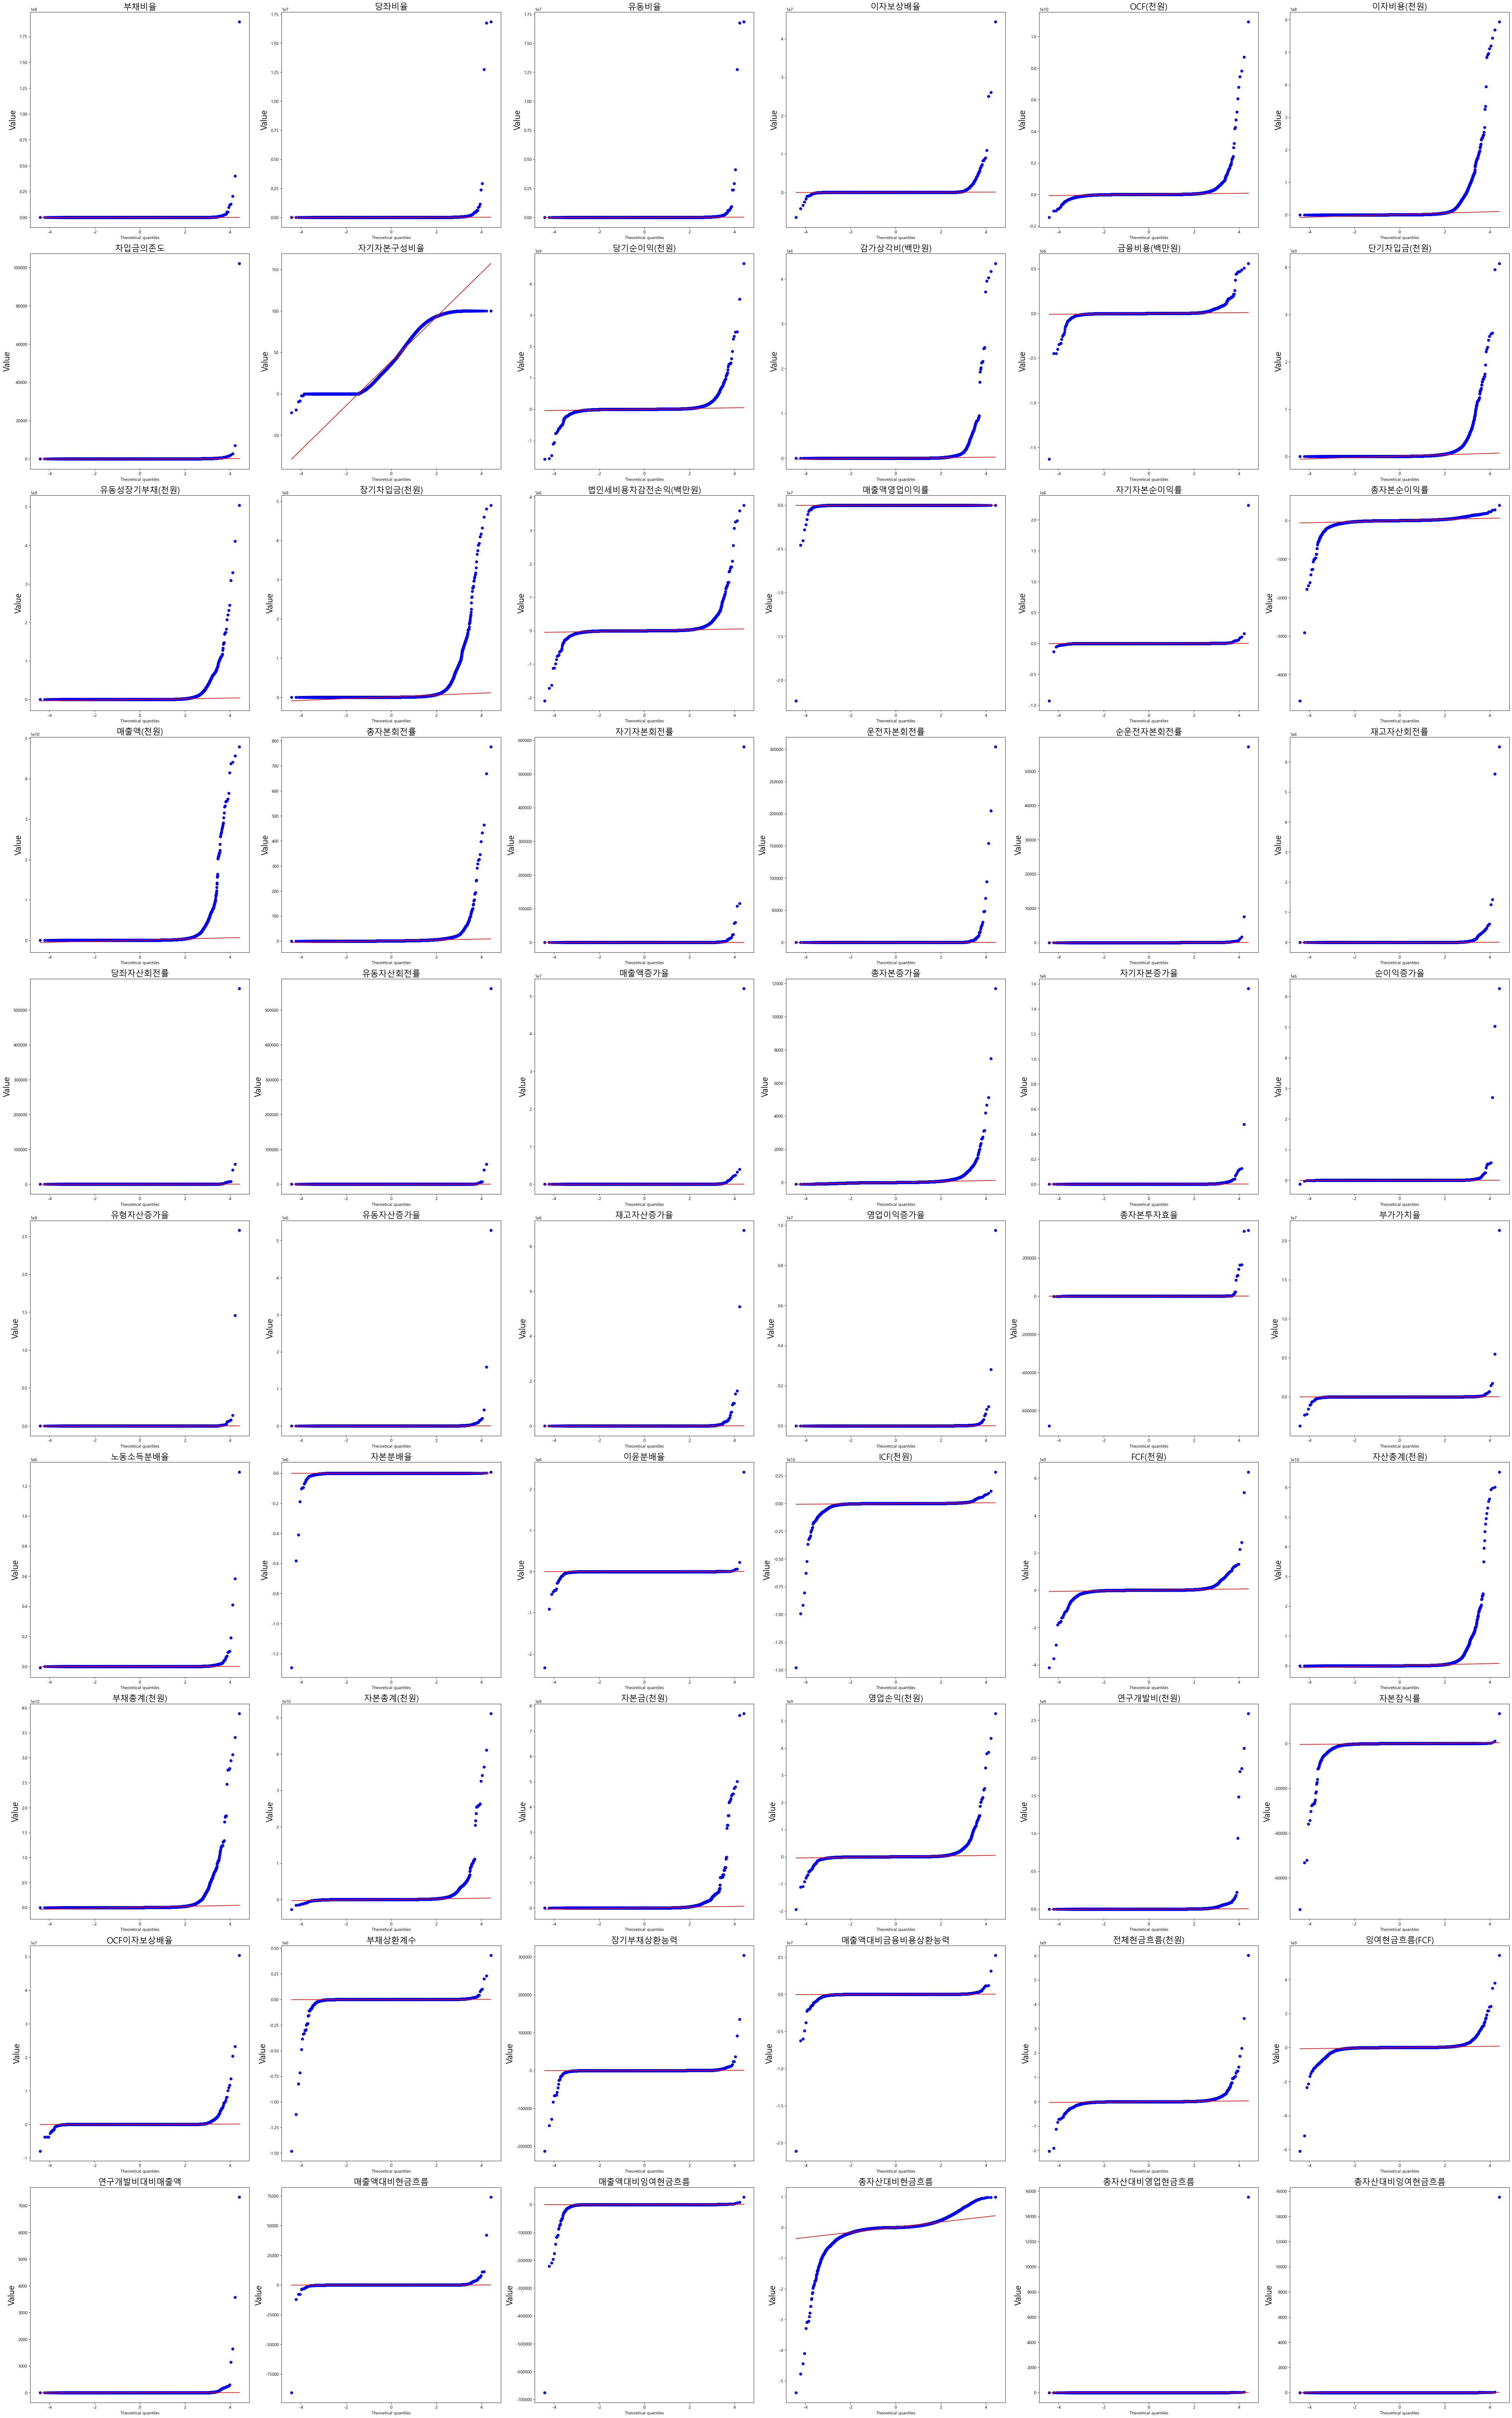

In [95]:
from scipy import stats

def qqplot(df, ncols, nrows):
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams["font.family"] = 'Malgun Gothic'
   
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
    fig.set_size_inches((50, 80))

    for ax, col in zip(axs.ravel(), df.columns):
        stats.probplot(df[col], dist=stats.norm, plot=ax)
        ax.set_title(col, fontsize=20)  # 글씨 크기 설정
        ax.set_ylabel('Value', fontsize=20)  # 글씨 크기 설정

    plt.show()

qqplot(df_수치_윈저라이징전, 6, 10)


---

### X_trian에 대한 윈져라이징 --> 보류 ! 드랍하기로함!

In [96]:
# import matplotlib.pyplot as plt

# columns=[ '부채비율', '당좌비율','유동비율', '이자보상배율', '차입금의존도', '자기자본구성비율',
#        '매출액영업이익률', '자기자본순이익률', '총자본순이익률',
#        '총자본회전률', '자기자본회전률', '운전자본회전률', '순운전자본회전률', '재고자산회전률',
#        '당좌자산회전률', '유동자산회전률', '매출액증가율', '총자본증가율', '자기자본증가율', '순이익증가율',
#        '유형자산증가율', '유동자산증가율', '재고자산증가율', '영업이익증가율', '총자본투자효율', '부가가치율',
#        '노동소득분배율', '자본분배율', '이윤분배율','파생이자보상배율',
#        '부채상환계수', '장기/EBITDA', '금융대비매출액', '연구개발비대비매출액',
#        '매출액대비현금흐름', '총자산대비현금흐름', '총부채대비현금흐름', '총자본대비현금흐름', '총자산대비영업현금흐름',
#        '총자본대비영업현금흐름', '총부채대비영업현금흐름']

# # subplots로 boxplot 출력 (4행 9열로 서브플롯 그리기)
# fig, axes = plt.subplots(nrows=7, ncols=6, figsize=(30, 24))

# # 36개의 컬럼에 대한 boxplot 그리기
# for i, col in enumerate(columns):
#     ax = axes[i // 6, i % 6]
#     ax.boxplot(X_train[col].dropna())
#     ax.set_title(col, fontsize=20)  # 글씨 크기 설정
#     ax.set_ylabel('Value', fontsize=20)  # 글씨 크기 설정

# # 남은 서브플롯 삭제
# for j in range(len(columns), 7 * 6):
#     fig.delaxes(axes[j // 6, j % 6])

# plt.tight_layout()
# plt.show()


In [97]:
# from scipy import stats

# def qqplot(df,ncols,nrows):
#     plt.rcParams['axes.unicode_minus'] = False
#     plt.rcParams["font.family"] = 'Malgun Gothic'
   
#     fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
#     fig.set_size_inches((50, 80))

#     for ax, i in zip(axs.ravel(), df):
#             ax.set_title(col, fontsize=20)  # 글씨 크기 설정
#             ax.set_ylabel('Value', fontsize=20)  # 글씨 크기 설정
#             stats.probplot(df[i], dist=stats.norm, plot=ax)
#             ax.set_title(str(i))

#     plt.show()

# qqplot(X_train[columns],7,6)

In [98]:
# from scipy.stats.mstats import winsorize

# X_train['부채비율'] = winsorize(X_train['부채비율'], limits= (0, 0.01))
# X_train['당좌비율'] = winsorize(X_train['당좌비율'], limits= (0, 0.01))
# X_train['유동비율'] = winsorize(X_train['유동비율'], limits= (0, 0.01))
# X_train['이자보상배율'] = winsorize(X_train['이자보상배율'], limits= (0, 0.01))
# X_train['차입금의존도'] = winsorize(X_train['차입금의존도'], limits= (0, 0.01))
# X_train['매출액영업이익률'] = winsorize(X_train['매출액영업이익률'], limits= (0.01, 0))
# X_train['자기자본순이익률'] = winsorize(X_train['자기자본순이익률'], limits= (0.008, 0.002))
# X_train['총자본순이익률'] = winsorize(X_train['총자본순이익률'], limits= (0.01, 0))
# X_train['총자본회전률'] = winsorize(X_train['총자본회전률'], limits= (0, 0.01))
# X_train['자기자본회전률'] = winsorize(X_train['자기자본회전률'], limits= (0, 0.01))
# X_train['운전자본회전률'] = winsorize(X_train['운전자본회전률'], limits= (0, 0.01))
# X_train['순운전자본회전률'] = winsorize(X_train['순운전자본회전률'], limits= (0, 0.01))
# X_train['재고자산회전률'] = winsorize(X_train['재고자산회전률'], limits= (0, 0.01))

# X_train['당좌자산회전률'] = winsorize(X_train['당좌자산회전률'], limits= (0, 0.01))
# X_train['유동자산회전률'] = winsorize(X_train['유동자산회전률'], limits= (0, 0.01))
# X_train['매출액증가율'] = winsorize(X_train['매출액증가율'], limits= (0, 0.01))
# X_train['총자본증가율'] = winsorize(X_train['총자본증가율'], limits= (0, 0.01))
# X_train['자기자본증가율'] = winsorize(X_train['자기자본증가율'], limits= (0, 0.01))
# X_train['순이익증가율'] = winsorize(X_train['순이익증가율'], limits= (0, 0.01))
# X_train['유형자산증가율'] = winsorize(X_train['유형자산증가율'], limits= (0, 0.01))
# X_train['유동자산증가율'] = winsorize(X_train['유동자산증가율'], limits= (0, 0.01))
# X_train['재고자산증가율'] = winsorize(X_train['재고자산증가율'], limits= (0, 0.01))
# X_train['영업이익증가율'] = winsorize(X_train['영업이익증가율'], limits= (0, 0.01))

# X_train['총자본투자효율'] = winsorize(X_train['총자본투자효율'], limits= (0.001, 0.009))
# X_train['부가가치율'] = winsorize(X_train['부가가치율'], limits= (0.001, 0.009))
# X_train['총자본투자효율'] = winsorize(X_train['총자본투자효율'], limits= (0.008, 0.002))
# X_train['노동소득분배율'] = winsorize(X_train['노동소득분배율'], limits= (0, 0.01))
# X_train['자본분배율'] = winsorize(X_train['자본분배율'], limits= (0.01, 0))
# X_train['이윤분배율'] = winsorize(X_train['이윤분배율'], limits= (0.009, 0.001))
# X_train['파생이자보상배율'] = winsorize(X_train['파생이자보상배율'], limits= (0.003, 0.007))

# X_train['부채상환계수'] = winsorize(X_train['부채상환계수'], limits= (0.006, 0.004))
# X_train['장기/EBITDA'] = winsorize(X_train['장기/EBITDA'], limits= (0.005, 0.005))
# X_train['금융대비매출액'] = winsorize(X_train['금융대비매출액'], limits= (0.004, 0.006))
# X_train['연구개발비대비매출액'] = winsorize(X_train['연구개발비대비매출액'], limits= (0, 0.01))
# X_train['매출액대비현금흐름'] = winsorize(X_train['매출액대비현금흐름'], limits= (0.005, 0.005))
# X_train['총자산대비현금흐름'] = winsorize(X_train['총자산대비현금흐름'], limits= (0.006, 0.004))
# # X_train['총부채대비현금흐름'] = winsorize(X_train['총부채대비현금흐름'], limits= (0.007, 0.003))
# X_train['총자본대비현금흐름'] = winsorize(X_train['총자본대비현금흐름'], limits= (0.005, 0.005))
# X_train['총자본대비영업현금흐름'] = winsorize(X_train['총자본대비영업현금흐름'], limits= (0.004, 0.006))
# # X_train['총자산대비영업현금흐름'] = winsorize(X_train['총자산대비영업현금흐름'], limits= (0.00, 0.006))
# X_train['총부채대비영업현금흐름'] = winsorize(X_train['총부채대비영업현금흐름'], limits= (0.002, 0.008))


---

#### 양쪽 꼬리를 drop하는 함수
    - 고려중

In [99]:
import numpy as np

def trimmed_mean_with_ratio(data, left_trim_ratio=0.01, right_trim_ratio=0.01):
    data.sort()
    left_trim_size = int(len(data) * left_trim_ratio)
    right_trim_size = int(len(data) * right_trim_ratio)
    trimmed_data = data[left_trim_size:-right_trim_size]
    return np.mean(trimmed_data)


---

In [100]:
# 데이터프레임에서 '이자보상배율' 열의 1퍼센트 절사평균과 표준편차 계산
def trimmed_mean_1(x):
    trim_pct = 0.1
    lower_bound = np.percentile(x, trim_pct * 100)
    upper_bound = np.percentile(x, (1 - trim_pct) * 100)
    trimmed_values = x[(x >= lower_bound) & (x <= upper_bound)]
    return trimmed_values.mean()

def trimmed_std_1(x):
    trim_pct = 0.1
    lower_bound = np.percentile(x, trim_pct * 100)
    upper_bound = np.percentile(x, (1 - trim_pct) * 100)
    trimmed_values = x[(x >= lower_bound) & (x <= upper_bound)]
    return trimmed_values.std()

train_data['평균이보배'] = train_data.groupby(['산업분류', 'Year'])['이자보상배율'].transform(trimmed_mean_1)
train_data['이보배표준편차'] = train_data.groupby(['산업분류', 'Year'])['이자보상배율'].transform(trimmed_std_1)

# 개별 이자보상배율과 평균-표준편차를 비교하여 이보배초과여부 계산
train_data['이보배초과여부'] = np.where(train_data['이자보상배율'] < (train_data['평균이보배'] - train_data['이보배표준편차']), 1, 0)

In [101]:
train_data[['회사명','거래소코드','산업분류','Year','이자보상배율', '평균이보배', '이보배초과여부']].head(50)

,회사명,거래소코드,산업분류,Year,이자보상배율,평균이보배,이보배초과여부
155541,주식회사라이프시맨틱스,86822,정보통신업,2018,-13.357516,1326.056999,0
47457,부산탱크터미널(주),42140,운수 및 창고업,2020,8.709388,13.661066,0
94639,주식회사덴츠엑스,60552,"전문, 과학 및 기술 서비스업",2019,-198.699143,1154.123345,0
147802,주식회사시영,81934,"전문, 과학 및 기술 서비스업",2016,14.620331,1791.081357,0
136831,주식회사골든트리,76348,부동산업,2016,13.221831,5.325901,0
32508,엔이케이(주),27320,제조업,2017,6057.061304,16.401185,0
150667,에스제이대명(주),83348,부동산업,2020,-0.480974,1.498424,0
148492,(주)굿데이,82258,부동산업,2019,0.088081,2.106804,0
9018,(주)문영건설,14611,건설업,2012,-3.475501,18.661858,0
137468,농업회사법인우일팜주식회사,76590,"농업, 임업 및 어업",2015,-198.699143,0.913573,1


In [102]:
train_data.describe()

,거래소코드,Year,산업분류코드,부채비율,당좌비율,유동비율,이자보상배율,OCF(천원),이자비용(천원),차입금의존도,...,매출액대비현금흐름,매출액대비잉여현금흐름,총자산대비현금흐름,총자산대비영업현금흐름,총자산대비잉여현금흐름,평균부채비율초과여부,t-1감사의견코드,평균이보배,이보배표준편차,이보배초과여부
count,137678.000000,137678.000000,137678.000000,1.376780e+05,1.376780e+05,1.376780e+05,1.376780e+05,1.376780e+05,1.376780e+05,137678.000000,...,137678.000000,137678.000000,137678.000000,137678.000000,137678.000000,0.0,137678.000000,137676.000000,137664.000000,137678.000000
mean,56504.795051,2016.847071,43.187655,3.376607e+03,7.692448e+02,8.839939e+02,3.577781e+03,4.516919e+06,1.037799e+06,39.492344,...,0.927343,-31.781615,0.009660,0.155635,0.087021,NaN,0.069742,290.296600,599.966017,0.047219
std,25136.065742,2.868442,20.272604,5.280078e+05,7.370967e+04,7.479661e+04,1.819595e+05,7.178401e+07,7.165366e+06,277.943172,...,346.050752,2329.778295,0.105092,41.846322,41.873091,NaN,0.254713,503.660699,965.136732,0.212107
min,10000.000000,2012.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,-6.555613e+06,-1.458339e+09,0.000000e+00,0.000000,...,-90635.401818,-675811.876667,-5.389148,-14.352936,-15.078481,NaN,0.000000,-198.699143,0.830118,0.000000
25%,41179.000000,2014.000000,26.000000,4.579000e+01,3.904000e+01,6.607000e+01,3.034576e-01,-2.252575e+05,5.539800e+04,9.540000,...,-0.019285,-0.111377,-0.012524,-0.010101,-0.080317,NaN,0.000000,7.451472,13.805549,0.000000
50%,58710.500000,2017.000000,41.000000,1.385900e+02,8.775000e+01,1.204350e+02,2.476108e+00,9.243200e+05,2.418120e+05,36.360000,...,0.001800,0.001891,0.000977,0.038371,0.001543,NaN,0.000000,17.216799,48.770979,0.000000
75%,74379.500000,2019.000000,60.000000,3.394300e+02,1.719675e+02,2.181875e+02,1.577124e+01,3.138292e+06,5.882782e+05,59.780000,...,0.040474,0.085118,0.027532,0.103398,0.060869,NaN,0.000000,81.267597,341.292986,0.000000
max,107278.000000,2022.000000,98.000000,1.892217e+08,1.685016e+07,1.685016e+07,4.444743e+07,1.094303e+10,5.937832e+08,102094.630000,...,73991.986111,26692.873333,0.990365,15526.802278,15536.566314,NaN,1.000000,6057.061304,2970.129979,1.000000


In [103]:
# import pandas as pd
# import numpy as np

# def calculate_mean_std_by_industry(df):
#     # 데이터프레임에서 산업과 연도별로 그룹화하여 이자보상배율의 평균과 표준편차를 계산하고 딕셔너리로 저장
#     grouped = df.groupby(['산업분류', 'Year'])
#     industry_mean_std_dict = {}
#     for (industry, year), group in grouped:
#         trimmed_mean = np.percentile(group['이자보상배율'], [1, 99]).mean()
#         trimmed_std = np.percentile(group['이자보상배율'], [1,99]).std()
#         industry_mean_std_dict[(industry, year)] = (trimmed_mean, trimmed_std)
    
#     return industry_mean_std_dict

# def calculate_excess_by_industry(df):
#     # 산업과 연도별 이자보상배율의 평균과 표준편차를 딕셔너리로 받기
#     industry_mean_std_dict = calculate_mean_std_by_industry(df)

#     # '이보배초과여부' 계산하여 설정
#     df['이보배초과여부'] = df.apply(lambda row: int(row['이자보상배율'] < (industry_mean_std_dict[(row['산업분류'], row['Year'])][0] - industry_mean_std_dict[(row['산업분류'], row['Year'])][1])), axis=1)




# # '이보배초과여부' 계산하여 설정
# calculate_excess_by_industry(train_data)

# train_data


In [104]:
train_data['이보배초과여부'].value_counts()

이보배초과여부
0    131177
1      6501
Name: count, dtype: int64

In [105]:
train_data[train_data['이보배초과여부']==1]['t-1감사의견코드'].value_counts()

t-1감사의견코드
0.0    6081
1.0     420
Name: count, dtype: int64

In [106]:
train_data['이자보상배율'].std()

181959.48343077485

In [107]:
train_data['이자보상배율'].mean()

3577.780954781264

In [108]:
len(train_data[train_data['이자보상배율']==999999999.0])

0

In [109]:
train_data.describe()

,거래소코드,Year,산업분류코드,부채비율,당좌비율,유동비율,이자보상배율,OCF(천원),이자비용(천원),차입금의존도,...,매출액대비현금흐름,매출액대비잉여현금흐름,총자산대비현금흐름,총자산대비영업현금흐름,총자산대비잉여현금흐름,평균부채비율초과여부,t-1감사의견코드,평균이보배,이보배표준편차,이보배초과여부
count,137678.000000,137678.000000,137678.000000,1.376780e+05,1.376780e+05,1.376780e+05,1.376780e+05,1.376780e+05,1.376780e+05,137678.000000,...,137678.000000,137678.000000,137678.000000,137678.000000,137678.000000,0.0,137678.000000,137676.000000,137664.000000,137678.000000
mean,56504.795051,2016.847071,43.187655,3.376607e+03,7.692448e+02,8.839939e+02,3.577781e+03,4.516919e+06,1.037799e+06,39.492344,...,0.927343,-31.781615,0.009660,0.155635,0.087021,NaN,0.069742,290.296600,599.966017,0.047219
std,25136.065742,2.868442,20.272604,5.280078e+05,7.370967e+04,7.479661e+04,1.819595e+05,7.178401e+07,7.165366e+06,277.943172,...,346.050752,2329.778295,0.105092,41.846322,41.873091,NaN,0.254713,503.660699,965.136732,0.212107
min,10000.000000,2012.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,-6.555613e+06,-1.458339e+09,0.000000e+00,0.000000,...,-90635.401818,-675811.876667,-5.389148,-14.352936,-15.078481,NaN,0.000000,-198.699143,0.830118,0.000000
25%,41179.000000,2014.000000,26.000000,4.579000e+01,3.904000e+01,6.607000e+01,3.034576e-01,-2.252575e+05,5.539800e+04,9.540000,...,-0.019285,-0.111377,-0.012524,-0.010101,-0.080317,NaN,0.000000,7.451472,13.805549,0.000000
50%,58710.500000,2017.000000,41.000000,1.385900e+02,8.775000e+01,1.204350e+02,2.476108e+00,9.243200e+05,2.418120e+05,36.360000,...,0.001800,0.001891,0.000977,0.038371,0.001543,NaN,0.000000,17.216799,48.770979,0.000000
75%,74379.500000,2019.000000,60.000000,3.394300e+02,1.719675e+02,2.181875e+02,1.577124e+01,3.138292e+06,5.882782e+05,59.780000,...,0.040474,0.085118,0.027532,0.103398,0.060869,NaN,0.000000,81.267597,341.292986,0.000000
max,107278.000000,2022.000000,98.000000,1.892217e+08,1.685016e+07,1.685016e+07,4.444743e+07,1.094303e+10,5.937832e+08,102094.630000,...,73991.986111,26692.873333,0.990365,15526.802278,15536.566314,NaN,1.000000,6057.061304,2970.129979,1.000000


In [110]:
train_data.columns

Index(['회사명', '거래소코드', '회계년도', 'Year', '산업분류코드', '산업분류', '부채비율', '당좌비율',
       '유동비율', '이자보상배율', 'OCF(천원)', '이자비용(천원)', '차입금의존도', '자기자본구성비율',
       '당기순이익(천원)', '감가상각비(백만원)', '금융비용(백만원)', '단기차입금(천원)', '유동성장기부채(천원)',
       '장기차입금(천원)', '법인세비용차감전손익(백만원)', '매출액영업이익률', '자기자본순이익률', '총자본순이익률',
       '매출액(천원)', '총자본회전률', '자기자본회전률', '운전자본회전률', '순운전자본회전률', '재고자산회전률',
       '당좌자산회전률', '유동자산회전률', '매출액증가율', '총자본증가율', '자기자본증가율', '순이익증가율',
       '유형자산증가율', '유동자산증가율', '재고자산증가율', '영업이익증가율', '총자본투자효율', '부가가치율',
       '노동소득분배율', '자본분배율', '이윤분배율', 'ICF(천원)', 'FCF(천원)', '자산총계(천원)',
       '부채총계(천원)', '자본총계(천원)', '자본금(천원)', '영업손익(천원)', '연구개발비(천원)', '자본잠식률',
       'OCF이자보상배율', '부채상환계수', '장기부채상환능력', '매출액대비금융비용상환능력', '전체현금흐름(천원)',
       '잉여현금흐름(FCF)', '연구개발비대비매출액', '매출액대비현금흐름', '매출액대비잉여현금흐름', '총자산대비현금흐름',
       '총자산대비영업현금흐름', '총자산대비잉여현금흐름', '기업수명주기', '평균부채비율초과여부', 't-1감사의견코드',
       '평균이보배', '이보배표준편차', '이보배초과여부'],
      dtype='object')